# Probabilidad y Estadística (C)
## Trabajo Práctico 2 

#### Alumno: Leandro Carreira
#### LU: 669/18                                                              

![](img/1.png)

### Estimador de momentos:

Uso el **primer** momento, pues si $b > 0$ con $X_n \sim \mathcal{U}[0,b]$ \,

\begin{equation*}
E [X_n] = \int_{0}^{b} x_i * \frac{1}{b} * dx
\end{equation*}

\begin{equation*}
= \frac{1}{b} * \left[ \frac{x^2_i}{2}\right]^b_0
\end{equation*}

\begin{equation*}
= \frac{b^2}{2b}
\end{equation*}

\begin{equation*}
E [X_n] = \frac{b}{2}
\end{equation*}

\begin{equation*}
\overline{X} = \frac{\hat{b}_{mom}}{2}
\end{equation*}

\begin{equation*}
\hat{b}_{mom} = 2 * \overline{X}
\end{equation*}

In [90]:
# Función estimadora de primeros momentos
bmom1 = function(muestra){
    return(2*mean(muestra))
}

Similarmente se puede calcular el EM con el **segundo** momento, al cual también voy a agregar en los siguientes ejercicios del TP, pues me parece una comparación interesante (no solo entre diferentes estimadores, sino también entre un mismo tipo, usando dos grados distintos):

\begin{equation*}
E [X_n^2] = \int_{0}^{b} x_i^2 * \frac{1}{b} * dx
\end{equation*}

\begin{equation*}
= \frac{1}{b} * \left[ \frac{x^3_i}{3}\right]^b_0
\end{equation*}

\begin{equation*}
= \frac{b^3}{3b}
\end{equation*}

\begin{equation*}
E [X_n^2] = \frac{b^2}{3}
\end{equation*}

\begin{equation*}
b^2 = 3 * E [X_n^2]
\end{equation*}

\begin{equation*}
 _{b\, >\, 0}
\end{equation*}

\begin{equation*}
b = \sqrt{3 * E [X_n^2]}
\end{equation*}

\begin{equation*}
\hat{b}_{mom2} = \sqrt{3 * \overline{X^2}}
\end{equation*}

In [91]:
# Función estimadora de segundos momentos
bmom2 = function(muestra){
    n <- length(muestra)
    return(sqrt(3 * mean(muestra^2)))
}

### Estimador de Máxima Verosimilitud

![](img/emv1.jpg)

![](img/emv2.jpg)

In [92]:
# Estimador de maxima verosimilitud
bmv = function(muestra){
    return(max(muestra))
}

![](img/2.png)

In [93]:
bmed = function(muestra){
    return(2*median(muestra))
}

![](img/3.png)

In [94]:
b <- 1
n <- 15
muestra <- runif(n, min=0, max=b)

### Valores estimados:

In [95]:
bmom1(muestra)
bmom2(muestra)
bmv(muestra)
bmed(muestra)

[1] 1,230074

[1] 1,161506

[1] 0,9435648

[1] 1,216799

### Errores:

mom1,mom2,max.ver,mediana
"-0,23007","-0,16151","0,05644","-0,2168"


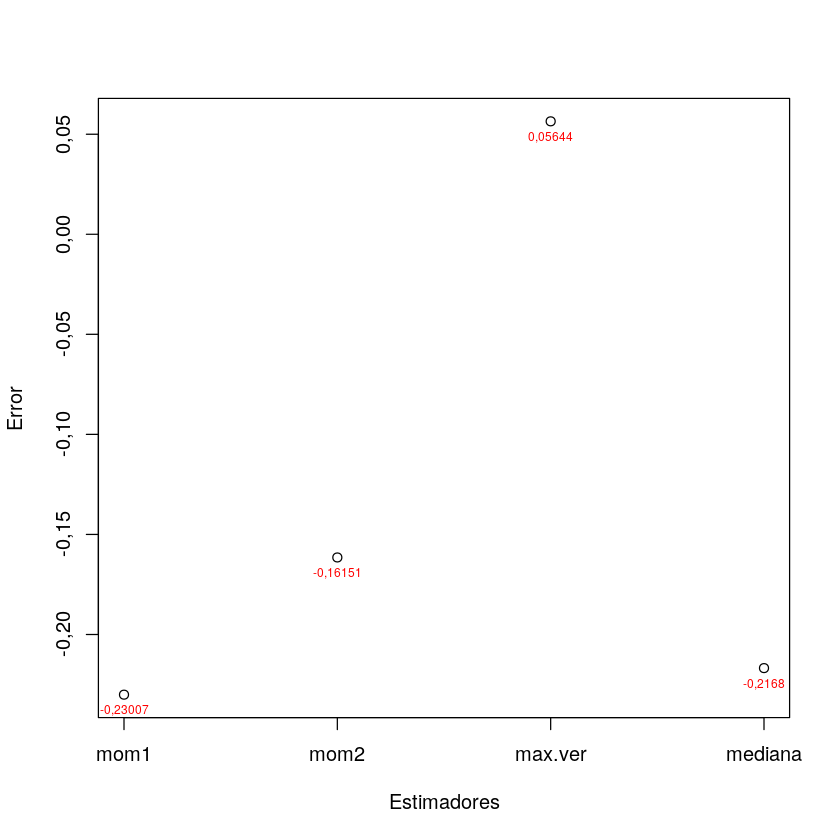

In [96]:
# Calculo errores
error_momento_1 <- b - bmom1(muestra)
error_momento_2 <- b - bmom2(muestra)
error_max_ver   <- b - bmv(muestra)
error_mediana   <- b - bmed(muestra)
# Agrupo datos para plot
errores <- c(error_momento_1, error_momento_2, error_max_ver,error_mediana)
nombres <- c('mom1','mom2','max.ver','mediana')
# Imprimo y ploteo errores para una mejor comparación
matrix(c(nombres, round(errores,5)), nrow=2, ncol=4, byrow=TRUE)
# Plot
#options(repr.plot.width=7, repr.plot.height=7)
plot(errores, xlab="Estimadores", ylab="Error", xaxt='n')
text(errores, as.character(round(errores,5)), cex=0.6, pos=1, col="red")
axis(1, c(1,2,3,4), nombres) 

![](img/4.png)

In [97]:
experimento = function(){
    # a)
    b <- 1
    n <- 15
    muestra <- runif(n, min=0, max=b)
    # b)
    b_mom1 <- bmom1(muestra)
    b_mom2 <- bmom2(muestra)
    b_mv  <- bmv(muestra)
    b_med <- bmed(muestra)
    #devuelvo un vector de estimadores
    c(b_mom1, b_mom2, b_mv, b_med)
}

In [98]:
# c)
nrep <- 1000
estimadores <- array(dim=c(nrep,4), dimnames=list(1:nrep, c("b_mom1", "b_mom2", "b_mv", "b_med")))
for(i in 1:nrep){
    estimadores[i,] <- array(experimento())
}

In [99]:
# Estimaciones guardadas de cada experimento
estimadores[2:4,]
estimadores[997:1000,]

,b_mom1,b_mom2,b_mv,b_med
2,"1,027140","1,046235","0,9691822","1,138274"
3,"1,301078","1,269474","0,9817760","1,690594"
4,"1,112685","1,067670","0,9360039","1,005805"


,b_mom1,b_mom2,b_mv,b_med
997,"1,135286","1,090027","0,9717307","1,086049"
998,"1,275937","1,152760","0,9913591","1,279192"
999,"1,185870","1,178291","0,9994554","1,439416"
1000,"1,117049","1,055218","0,9030076","1,028910"


#### Sesgo:

In [100]:
# d)
# aplico mean a cada columna (estimador) de mi data
b_muestrales <- apply(estimadores, MARGIN=2, FUN=mean)
print(b_muestrales)

   b_mom1    b_mom2      b_mv     b_med 
0,9929238 0,9870084 0,9366054 0,9917986 


In [101]:
#sesgos <- medias_muestrales - b
b <- 1
sesgos <- b_muestrales - b

In [102]:
print(sesgos)

      b_mom1       b_mom2         b_mv        b_med 
-0,007076192 -0,012991577 -0,063394645 -0,008201381 


#### Varianza muestral: 
Uso estimador insesgado: $S^2 =  \frac{\sum (X_i - \hat{\mu} )^2}{n-1}$

In [103]:
# e)
varianzas_muestrales <- apply(estimadores, MARGIN=2, FUN=var)

In [104]:
print(varianzas_muestrales)

     b_mom1      b_mom2        b_mv       b_med 
0,023003304 0,014521963 0,003851397 0,058599452 


#### Error Cuadrático Medio:

In [105]:
# f) Aproximación del Error Cuadratico Medio (ECM)
ECM <- varianzas_muestrales + sesgos^2
print(ECM)

     b_mom1      b_mom2        b_mv       b_med 
0,023053377 0,014690744 0,007870278 0,058666715 


![](img/5.png)

In [106]:
# Funciones simuladoras:
# Devuelven sesgo y varianza aproximados
# promediando 1000 experimentos
# con Estimador de Maxima Verosimilitud
simulacion_mv = function(b, n){
    nE <- 1000
    # Guardo todas las estimaciones
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmv(muestra)
        # Guardo b estimado para calcular Sesgo/Var luego
        all_b_est[i] <- b_est
    }
    # Calculo Sesgo y Varianza usando todas las muestras
    sesgo_est <- mean(all_b_est) - b
    # Calculo varianza muestral, usando b estimados
    varianza_est <- var(all_b_est)
    return(c(sesgo_est, varianza_est))
}

# con Estimador de 1er Momento
simulacion_mom = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmom1(muestra)
        all_b_est[i] <- b_est
    }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- var(all_b_est)
    return(c(sesgo_est, varianza_est))
}

# Agrego también simulación de 2do momento
simulacion_mom2 = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmom1(muestra)
        all_b_est[i] <- b_est
        }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- var(all_b_est)
    return(c(sesgo_est, varianza_est))
}

# con Mediana de la muestra
simulacion_med = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmed(muestra)
        all_b_est[i] <- b_est
        }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- var(all_b_est)
    return(c(sesgo_est, varianza_est))
}

![](img/6.png)

In [107]:
# Calculo sesgos, varianzas y ECM para 20 valores
# distintos de b entre 0 y 2 (no inclusives)
nB <- 20
b_values <- seq(0.1, 1.9, by=1.8/(nB-1))
# nB filas, 3 columnas: (bias, var, ECM)
results_mv   <- matrix(nrow=nB, ncol=3)
results_mom  <- matrix(nrow=nB, ncol=3)
results_mom2 <- matrix(nrow=nB, ncol=3)
results_med  <- matrix(nrow=nB, ncol=3)

for (i in 1:nB){
    b <- b_values[i]
    results_mv[i,1:2]   <- simulacion_mv(b, 15)
    results_mom[i,1:2]  <- simulacion_mom(b, 15)
    results_mom2[i,1:2] <- simulacion_mom2(b, 15)
    results_med[i,1:2]  <- simulacion_med(b, 15)
    # ECM = Var + Sesgo^2
    results_mv[i,3]   <- results_mv[i,1]^2   + results_mv[i,2]
    results_mom[i,3]  <- results_mom[i,1]^2  + results_mom[i,2]
    results_mom2[i,3] <- results_mom2[i,1]^2 + results_mom2[i,2]
    results_med[i,3]  <- results_med[i,1]^2  + results_med[i,2]
}

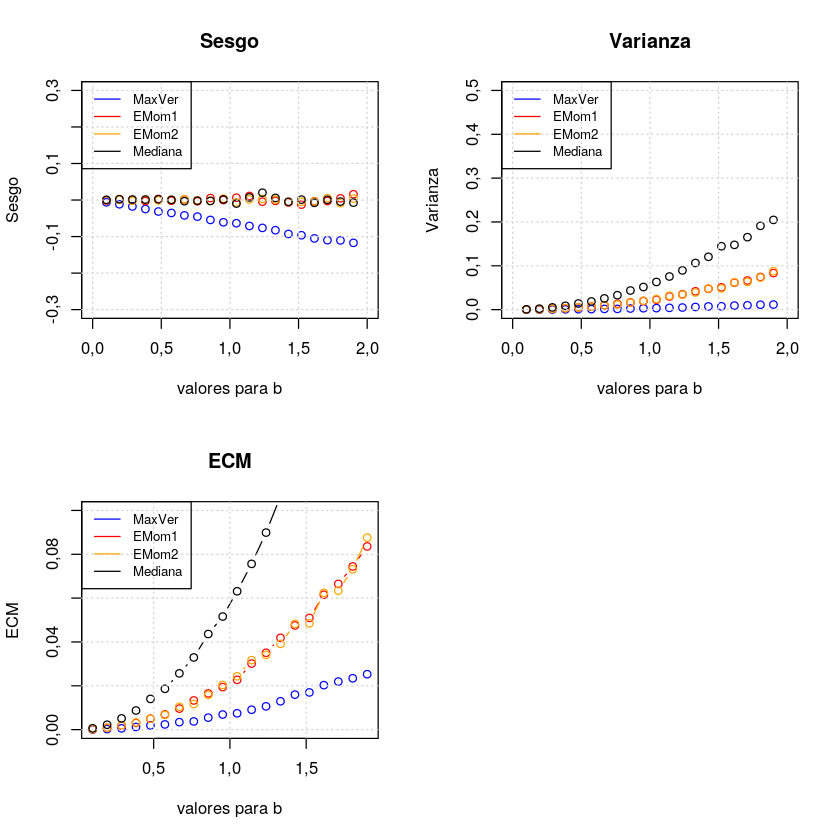

In [108]:
par(mfrow=c(2,2))
# Sesgos
plot(b_values, results_mv[,1], ylim=c(-0.3,0.3), xlim=c(0,2),
     col="blue", main="Sesgo", xlab="valores para b", ylab="Sesgo", type="b")
points(b_values, results_mom[,1], col="red", type="b")
points(b_values, results_mom2[,1], col="orange", type="b")
points(b_values, results_med[,1], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# Varianzas
plot(b_values, results_mv[,2], ylim=c(0,0.5), xlim=c(0,2),
     col="blue", main="Varianza", xlab="valores para b", ylab="Varianza", type="b")
points(b_values, results_mom[,2], col="red", type="b")
points(b_values, results_mom2[,2], col="orange", type="b")
points(b_values, results_med[,2], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# ECM = Var + Sesgo^2
plot(b_values, results_mv[,3], col="blue", main="ECM", xlab="valores para b", ylab="ECM", type="b", ylim=c(0.0,0.1))
points(b_values, results_mom[,3], col="red", type="b")
points(b_values, results_mom2[,3], col="orange", type="b")
points(b_values, results_med[,3], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)

### Observaciones:

* A medida que aumento b (manteniendo el tamaño de muestra), los estimadores de momento y mediana aumentan tanto varianza como ECM

* El estimador de máxima verosimilitud muestra una varianza de un orden mucho menor, aunque un sesgo que aumenta de manera negativa.

* Ésto es de esperarse ya que para un b cercano a cero, los valores que serán simulados en la muestra estarán muy acotados, mientras que al incrementar b, podrán aparecer valores más grandes en la muestra, y por ende, haber diferencias más grandes en las estimaciones.

### Decisiones:

* El criterio para decidir qué estimador elegir será seleccionar el de menor ECM, en este caso, el estimador de máxima verosimilitud.


![](img/7.png)

In [109]:
# Calculo sesgos, varianzas para distintos valores de n
n_values <- c(15, 30, 60, 120, 240)
nN <- length(n_values)
# nN filas, 4 columnas: (n, Sesgo, Var, ECM)
results_mv   <- matrix(nrow=nN, ncol=4)
results_mom  <- matrix(nrow=nN, ncol=4)
results_mom2 <- matrix(nrow=nN, ncol=4)
results_med  <- matrix(nrow=nN, ncol=4)

for (i in 1:nN){
    n <- n_values[i]
    # Guardo n en [1]
    results_mv[i,1]   <- n
    results_mom[i,1]  <- n
    results_mom2[i,1] <- n
    results_med[i,1]  <- n
    # Realizo 1000 simulaciones y guardo
    # Sesgos[2] y Varianzas[3] para graficarlos
    results_mv[i,2:3]   <- simulacion_mv(1, n)
    results_mom[i,2:3]  <- simulacion_mom(1, n)
    results_mom2[i,2:3] <- simulacion_mom2(1, n)
    results_med[i,2:3]  <- simulacion_med(1, n)
    # ECM[4] = Var + Sesgo^2
    results_mv[i,4]   <- results_mv[i,2]^2   + results_mv[i,3]
    results_mom[i,4]  <- results_mom[i,2]^2  + results_mv[i,3]
    results_mom2[i,4] <- results_mom2[i,2]^2 + results_mv[i,3]
    results_med[i,4]  <- results_med[i,2]^2  + results_mv[i,3]
}

In [110]:
results_mv
# n   Sesgo    Varianza   ECM

15,"-0,061511780","3,277360e-03","7,061059e-03"
30,"-0,032789664","9,820771e-04","2,057239e-03"
60,"-0,016096645","2,453247e-04","5,044266e-04"
120,"-0,008107359","6,243177e-05","1,281610e-04"
240,"-0,003909748","1,401666e-05","2,930279e-05"


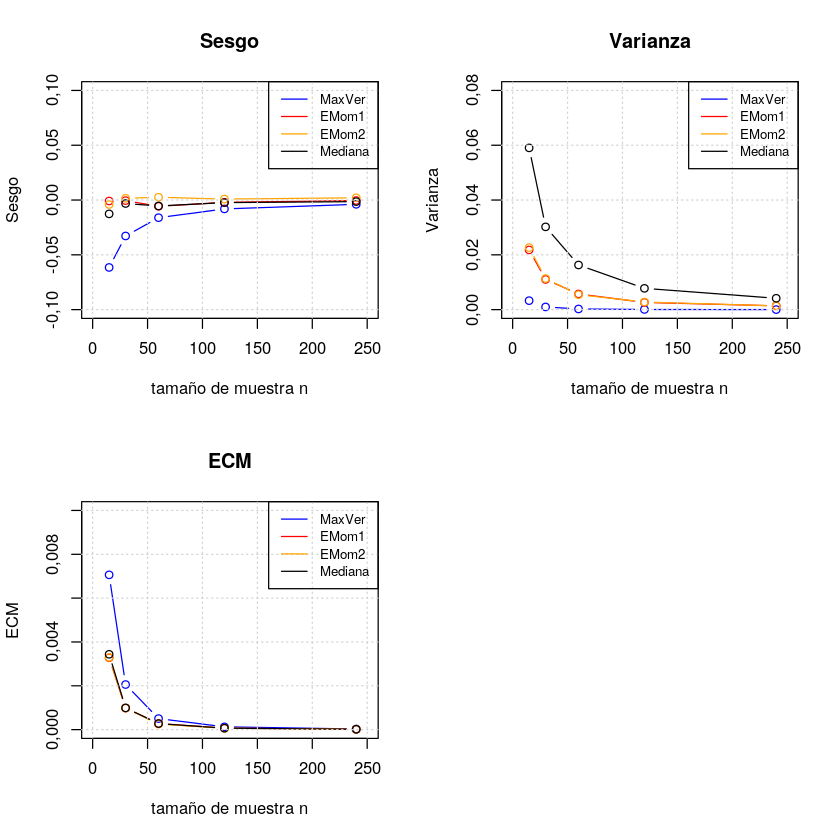

In [111]:
par(mfrow=c(2,2))
# Sesgos
plot(results_mv[,c(1,2)], ylim=c(-0.10,0.1), xlim=c(0,250),
     col="blue", main="Sesgo", xlab="tamaño de muestra n", ylab="Sesgo", type="b")
points(results_mom[,c(1,2)], col="red", type="b")
points(results_mom2[,c(1,2)], col="orange", type="b")
points(results_med[,c(1,2)], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topright", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# Varianzas
plot(results_mv[,c(1,3)], ylim=c(0.0,0.08), xlim=c(0,250),
     col="blue", main="Varianza", xlab="tamaño de muestra n", ylab="Varianza", type="b")
points(results_mom[,c(1,3)], col="red", type="b")
points(results_mom2[,c(1,3)], col="orange", type="b")
points(results_med[,c(1,3)], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topright", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# ECM 
plot(results_mv[,c(1,4)], col="blue", main="ECM", xlab="tamaño de muestra n", ylab="ECM", type="b", ylim=c(0.0,0.01), xlim=c(0,250))
points(results_mom[,c(1,4)], col="red", type="b")
points(results_mom2[,c(1,4)], col="orange", type="b")
points(results_med[,c(1,4)], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topright", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)

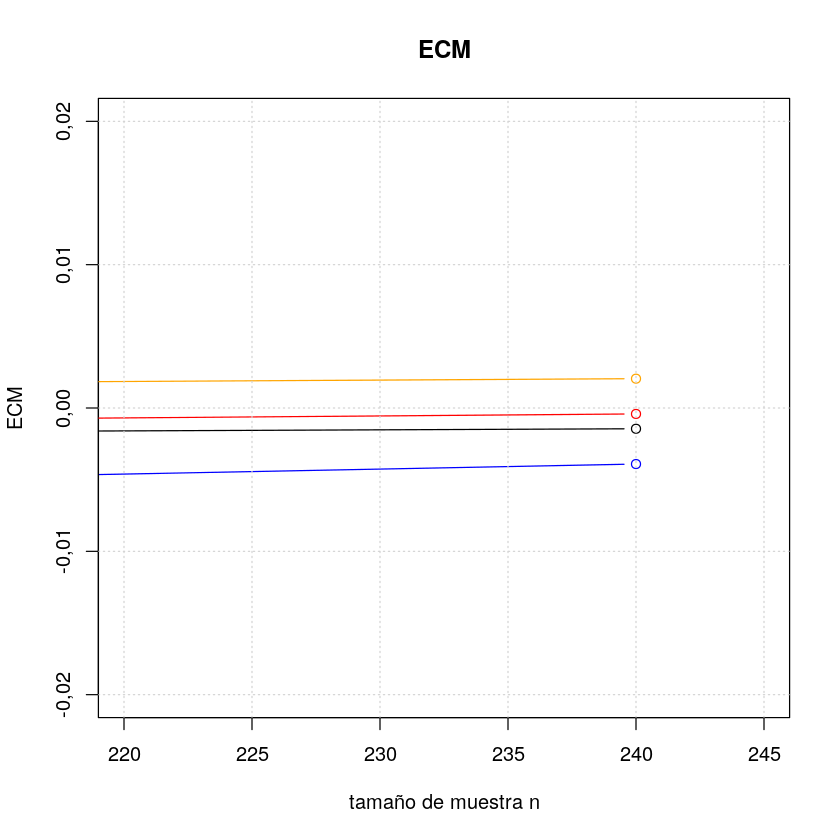

In [112]:
# Zoom en mayor n alcanzado
plot(results_mv, ylim=c(-0.02, 0.02), xlim=c(220,245),
     col="blue", main="ECM", xlab="tamaño de muestra n", ylab="ECM", type="b")
points(results_mom, col="red", type="b")
points(results_mom2, col="orange", type="b")
points(results_med, col="black", type="b")
grid()

### Observaciones:

* Todos los estimadores parecen converger (al menos de manera asintótica) a cero a medida que se aumenta el tamaño de la muestra, de tener un tamaño de muestra grande, cualquier estimador devolvería buenas estimaciones, mientras que para tamaños de muestra más pequeños, sería un poco más cauteloso e iría por los estimadores de momento, que parecen devolver buenos resultados a pesar de ello (como fue observado más arriba).

![](img/8.png)

In [113]:
X <- c(0.917, 0.247, 0.384, 0.530, 0.798,
       0.912, 0.096, 0.684, 0.394, 20.1,
       0.769, 0.137, 0.352, 0.332, 0.670)

In [114]:
b_mv <- bmv(X)
b_mom <- bmom1(X)
b_mom2 <- bmom2(X)
b_med <- bmed(X)

In [115]:
b_mv
b_mom
b_mom2
b_med

[1] 20,1

[1] 3,642933

[1] 9,041397

[1] 1,06

### Observaciones:
* Tanto revisando la data como gradicando un boxplot, se ve que el error es debido a un outlier de un valor 40 veces mayor al resto de la muestra.

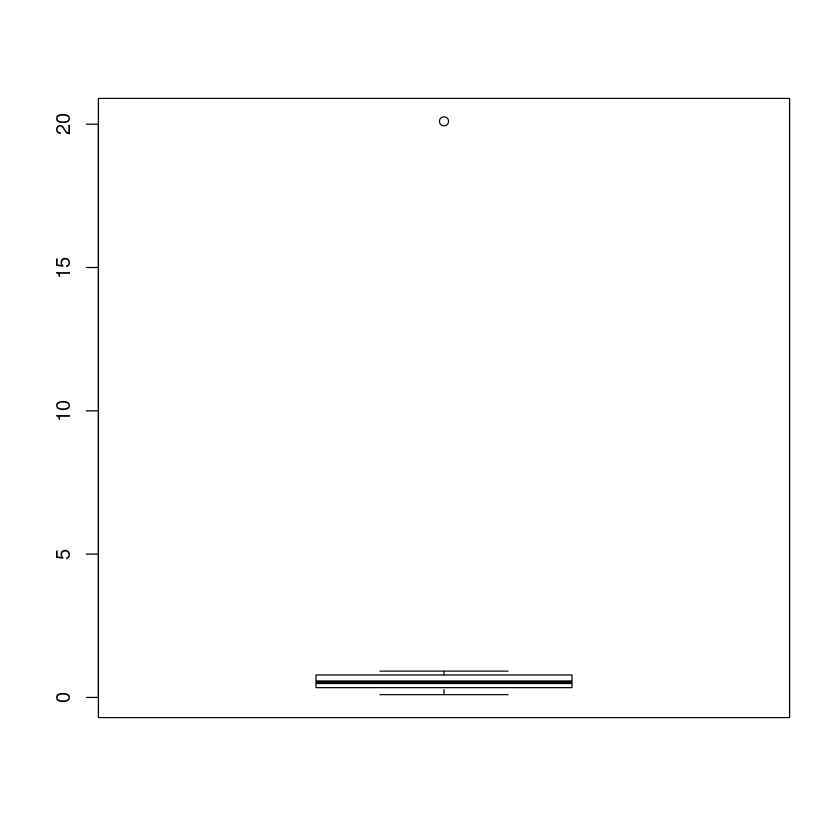

In [116]:
boxplot(X)

* Una vez __comprobado__ que sea un outlier, podemos 'reparar' nuestra muestra eliminando el valor fuera de rango, y calcular los estimadores con el resto de la muestra, como se realiza a continuación:

In [117]:
X_fixed <- c(0.917, 0.247, 0.384, 0.530, 0.798,
       0.912, 0.096, 0.684, 0.394,
       0.769, 0.137, 0.352, 0.332, 0.670)

In [118]:
b_mv <- bmv(X_fixed)
b_mom <- bmom1(X_fixed)
b_mom2 <- bmom2(X_fixed)
b_med <- bmed(X_fixed)

In [119]:
b_mv
b_mom
b_mom2
b_med

[1] 0,917

[1] 1,031714

[1] 1,006153

[1] 0,924

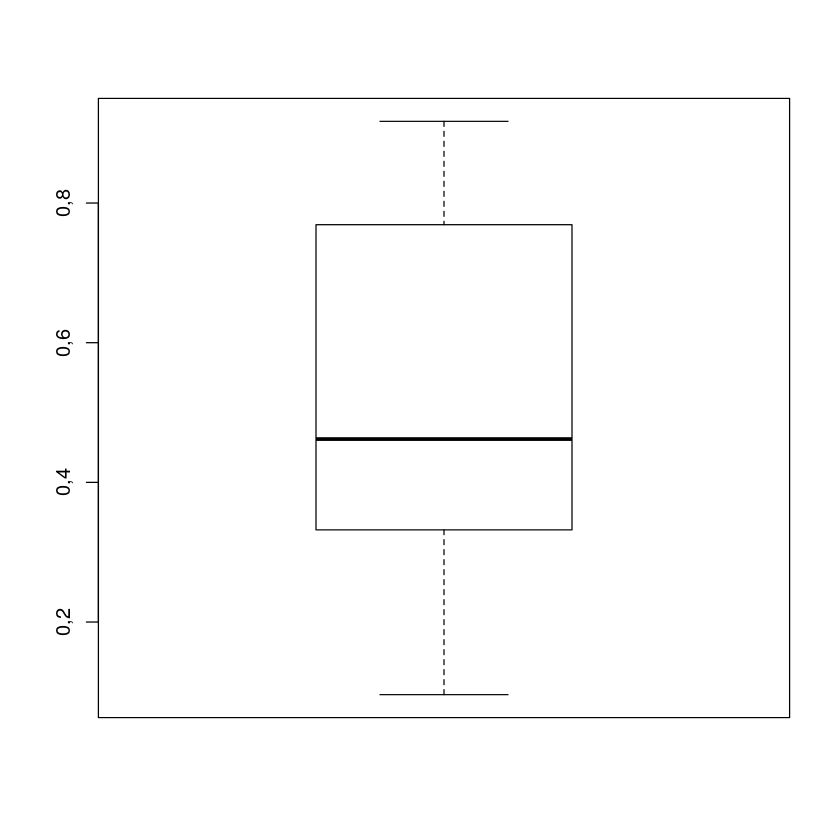

In [120]:
boxplot(X_fixed)

![](img/9.png)

In [121]:
n <- 15
b <- 1
X <- runif(n, 0, b)

In [122]:
# Minicódigo a implementar en funciones simuladoras
X_cont <- X
# Contamino cada elemento con proba 0.005
for(i in 1:n){
    pC <- 0.005 # 1/200
    if(runif(1) < pC){
        
        X_cont[i] <- X_cont[i] * 100
    }
}

# De manera más eficiente (y bonita :)
pC <- 1/200
mask <- runif(n)
X_cont[mask<pC] <- X_cont[mask<pC] * 100

#### a) Probabilidad de que la muestra esté contaminada:

La probabilidad de que la muestra esté contaminada (C) será 1 menos la probabilidad de que **no** esté contaminada ($\not$C)

$P(C) = 1 - P(\not C) $

Cada elemento tiene $p=\frac{1}{200}=0.005$ de ser contaminado, o sea $p=\frac{199}{200}=0.995$

$P(\not C)=(\frac{199}{200})^n$

siendo $n$ la cantidad de elementos de la muestra, sabemos que $n=15$

$P(\not C)=(\frac{199}{200})^{15} = 0.927569$

por lo que la probabilidad de que la muestra esté contaminada es de

$P(C) = 1 - 0.927569$

$P(C) = 0.072431$

$P(C) \approx 7.24\%$

#### b) Aproximaciones obtenidas:


In [123]:
# Funciones simuladoras CON CONTAMINACIÓN:
# Devuelven sesgo y varianza aproximados
# promediando 1000 experimentos
# con Estimador de Maxima Verosimilitud
simulacion_mv_cont = function(b, n){
    nE <- 1000
    # Guardo todas las estimaciones
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # --[Contaminación con proba pC]--
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # --[Fin contaminación]--
        b_est <- bmv(muestra)
        # Guardo b estimado para calcular Sesgo luego
        all_b_est[i] <- b_est
    }
    # Calculo Sesgo y Varianza usando todas las muestras
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- var(all_b_est)
    return(c(sesgo_est, varianza_est))
}

# con Estimador de 1er Momento
simulacion_mom_cont = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # --[Contaminación con proba pC]--
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # --[Fin contaminación]--
        b_est <- bmom1(muestra)
        all_b_est[i] <- b_est
    }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- var(all_b_est)
    return(c(sesgo_est, varianza_est))
}

# Agrego también simulación de 2do momento
simulacion_mom2_cont = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # --[Contaminación con proba pC]--
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # --[Fin contaminación]--
        b_est <- bmom1(muestra)
        all_b_est[i] <- b_est
        }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- var(all_b_est)
    return(c(sesgo_est, varianza_est))
}

# con Mediana de la muestra
simulacion_med_cont = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # --[Contaminación con proba pC]--
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # --[Fin contaminación]--
        b_est <- bmed(muestra)
        all_b_est[i] <- b_est
        }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- var(all_b_est)
    return(c(sesgo_est, varianza_est))
}

In [124]:
# Calculo sesgos, varianzas y ECM para 20 valores
# distintos de b entre 0 y 2 (no inclusives)
nB <- 20
b_values <- seq(0.1, 1.9, by=1.8/(nB-1))
# nB filas, 3 columnas: (bias, var, ECM)
results_mv   <- matrix(nrow=nB, ncol=3)
results_mom  <- matrix(nrow=nB, ncol=3)
results_mom2 <- matrix(nrow=nB, ncol=3)
results_med  <- matrix(nrow=nB, ncol=3)

for (i in 1:nB){
    b <- b_values[i]
    # Guardo Sesgo y Varianza para cada b
    results_mv[i,1:2]   <- simulacion_mv_cont(b, 15)
    results_mom[i,1:2]  <- simulacion_mom_cont(b, 15)
    results_mom2[i,1:2] <- simulacion_mom2_cont(b, 15)
    results_med[i,1:2]  <- simulacion_med_cont(b, 15)
    # Calculo ECM = Sesgo^2 + Var
    results_mv[i,3] <- results_mv[i,1]^2+results_mv[i,2]
    results_mom[i,3] <- results_mom[i,1]^2+results_mom[i,2]
    results_mom2[i,3] <- results_mom2[i,1]^2+results_mom2[i,2]
    results_med[i,3] <- results_med[i,1]^2+results_med[i,2]
}

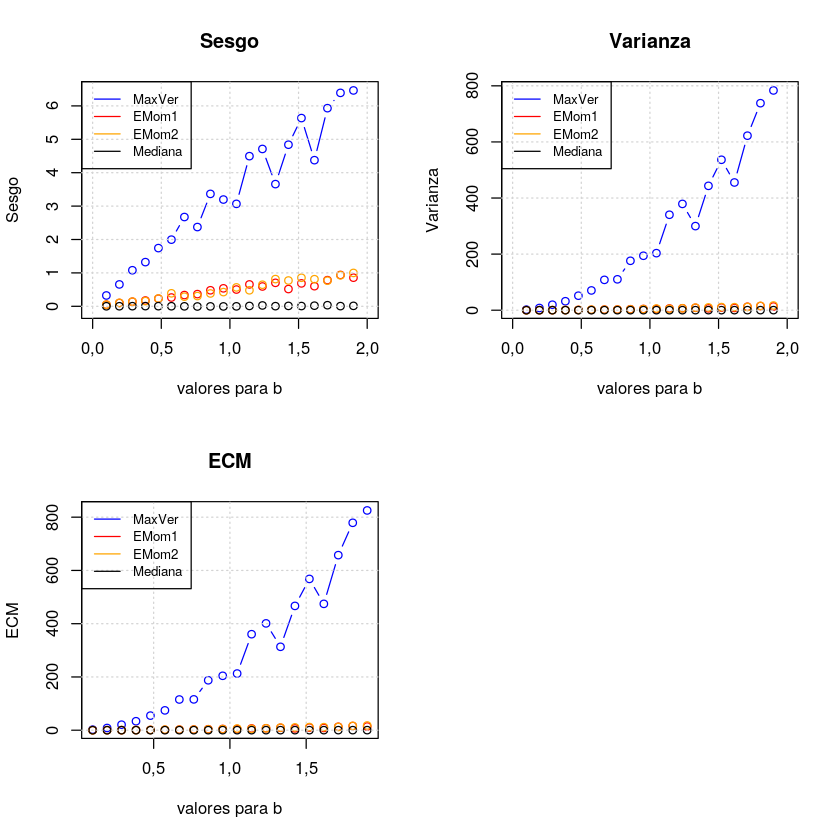

In [125]:
par(mfrow=c(2,2))
# Plot para Sesgos
ylim <- c(-0.1, max(results_mv[,1]))
plot(b_values, results_mv[,1], xlim=c(0,2), ylim=ylim, 
     col="blue", main="Sesgo", xlab="valores para b", ylab="Sesgo", type="b")
points(b_values, results_mom[,1], col="red", type="b")
points(b_values, results_mom2[,1], col="orange", type="b")
points(b_values, results_med[,1], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# Plot para Varianzas
plot(b_values, results_mv[,2], xlim=c(0,2),
     col="blue", main="Varianza", xlab="valores para b", ylab="Varianza", type="b")
points(b_values, results_mom[,2], col="red", type="b")
points(b_values, results_mom2[,2], col="orange", type="b")
points(b_values, results_med[,2], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# Plot para ECM
plot(b_values, results_mv[,3], col="blue", main="ECM", xlab="valores para b", ylab="ECM", type="b")
points(b_values, results_mom[,3], col="red", type="b")
points(b_values, results_mom2[,3], col="orange", type="b")
points(b_values, results_med[,3], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)

#### c) Qué estimador prefiero?

* En este caso la muestra está contaminada de una forma particular: con esporádicos valores muy por encima de la media.

 Se observa en los gráficos que el estimador de Máxima Verosimilitud es __muy__ sensible a outliers, dado que utiliza el máximo valor de cada muestra como estimación de b, ignorando todos los otros valores.
 
 Ésto resulta en estimaciones catastróficas, dado que por más que se tenga una muestra con 10 millones de valores cercanos a 1.0, y un único outlier muy por encima de este número, el EMV solo usará la información de este último, errando por un gran márgen su estimación.
 
 Los otros tres estimadores (ambos de Momentos, y Mediana) parecen ser mucho más consistentes con el resto de la data, en especial el estimador de Mediana al observar su Sesgo: Es básicamente inmune a este tipo de contaminación.

    [Fin del tp]